<h1 style="text-align: center;">Deep learning - neural network - Forest Cover type classification</h1>

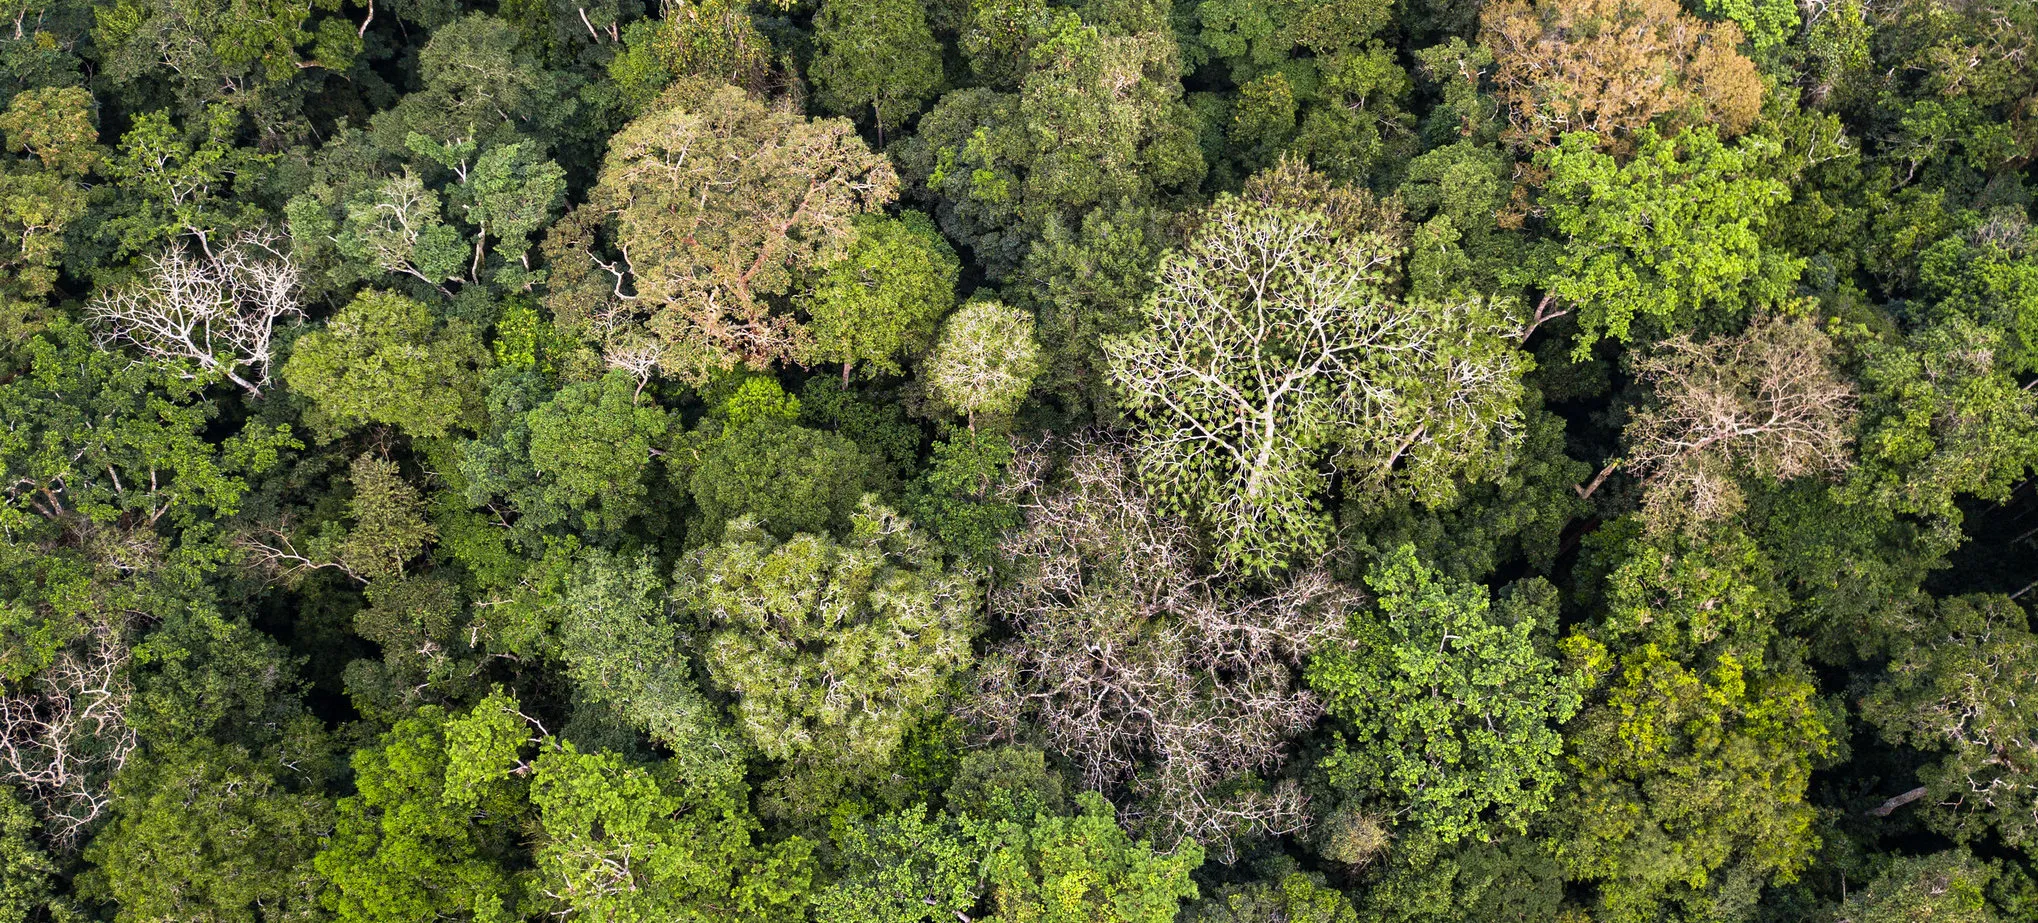


https://news.globallandscapesforum.org/44355/4-06-billion-remaining-hectares-and-other-new-numbers-on-forests-but-what-do-they-mean/

## Objective: Build a deep learning model to predict the forest cover type from different cartographic variables.

### Packages used:
    1. Tensorflow (Keras)
    2. Sklearn
    3. Pandas
    4. Numpy
    5. Seaborn
    6. Matplotlib
    
### Content
A csv file ('cover_data.csv') that contains 581012 observations. Each observation has 55 columns (54 features and the last one being the class).

## Acknowledgements
Images are collected from codecademy while taking their deep learning course.


In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.metrics import Precision, F1Score, Recall
from sklearn.preprocessing import OneHotEncoder


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

2023-08-25 01:55:00.433873: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Disable those annoying warnings
tf.get_logger().setLevel('ERROR')

# Turn off GPU usage for tf
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '2'

## Importing and Inspecting Data
Import data and inspect the aggregates and check for null values.

In [3]:
infile = 'cover_data.csv'
raw_df = pd.read_csv(infile)

class_names = ['Spruce/Fir', 'Lodgepole Pine',
               'Ponderosa Pine', 'Cottonwood/Willow',
               'Aspen', 'Douglas-fir', 'Krummholz']

In [4]:
raw_df.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [6]:
raw_df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
raw_df.nunique()

Elevation                             1978
Aspect                                 361
Slope                                   67
Horizontal_Distance_To_Hydrology       551
Vertical_Distance_To_Hydrology         700
Horizontal_Distance_To_Roadways       5785
Hillshade_9am                          207
Hillshade_Noon                         185
Hillshade_3pm                          255
Horizontal_Distance_To_Fire_Points    5827
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               2
Soil_Type8                               2
Soil_Type9                               2
Soil_Type10

We can now see that a majority of the features have 2 classes. This indicates a binary classing so a histogram is not an accurate representation of the data

## Splitting Data and Scaling the Features 

In [8]:
cols = list(raw_df.columns)
features, label = cols[:-1], cols[-1]

raw_data = raw_df.values
X, y = raw_data[:, :-1], raw_data[:, -1]

#Important to include when specifying class weight, indices must start from 0
y = y-1

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

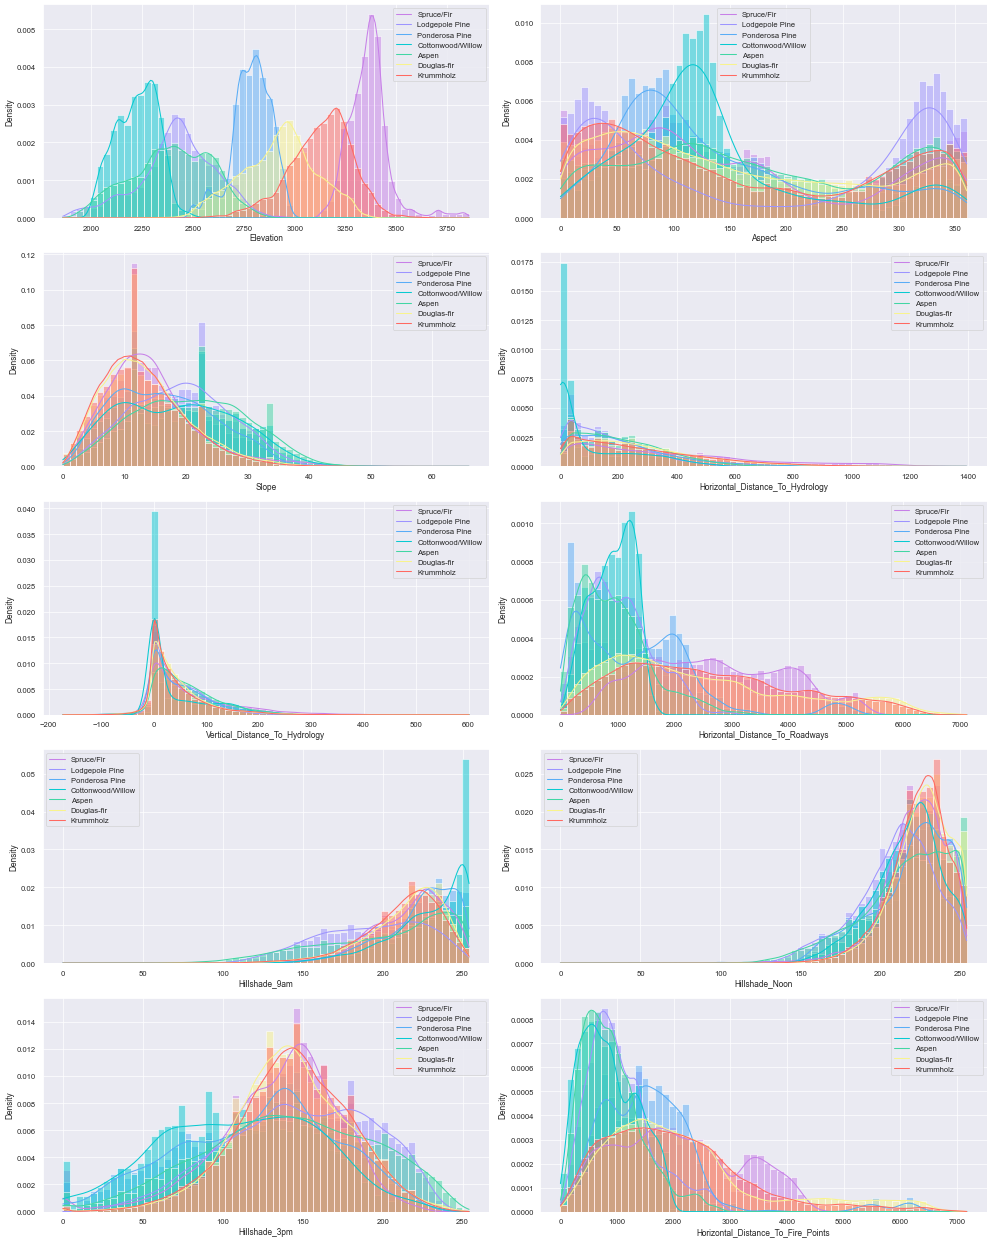

In [9]:
num_cols = 2
num_rows = 5
    
# Set the style of the plot
sns.set(style='darkgrid')

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 25), dpi=50)
axes = axes.flatten()

colors = ['r', '#ff6961', '#f8f38d', '#42d6a4', '#08cad1', '#59adf6', '#9d94ff', '#c780e8']
palette = {key: val for key,val in enumerate(colors)}

for n, col in enumerate(cols[:-1][:10]):
    hist = sns.histplot(raw_df, 
                        x=col, 
                        bins=60, 
                        kde=True, 
                        hue='class', 
                        stat="density", 
                        common_norm=False, 
                        palette=palette,  
                        ax=axes[n])

    hist.legend(labels=class_names)
        
for ax in axes[10:]:
    ax.remove()

plt.tight_layout()
plt.show()

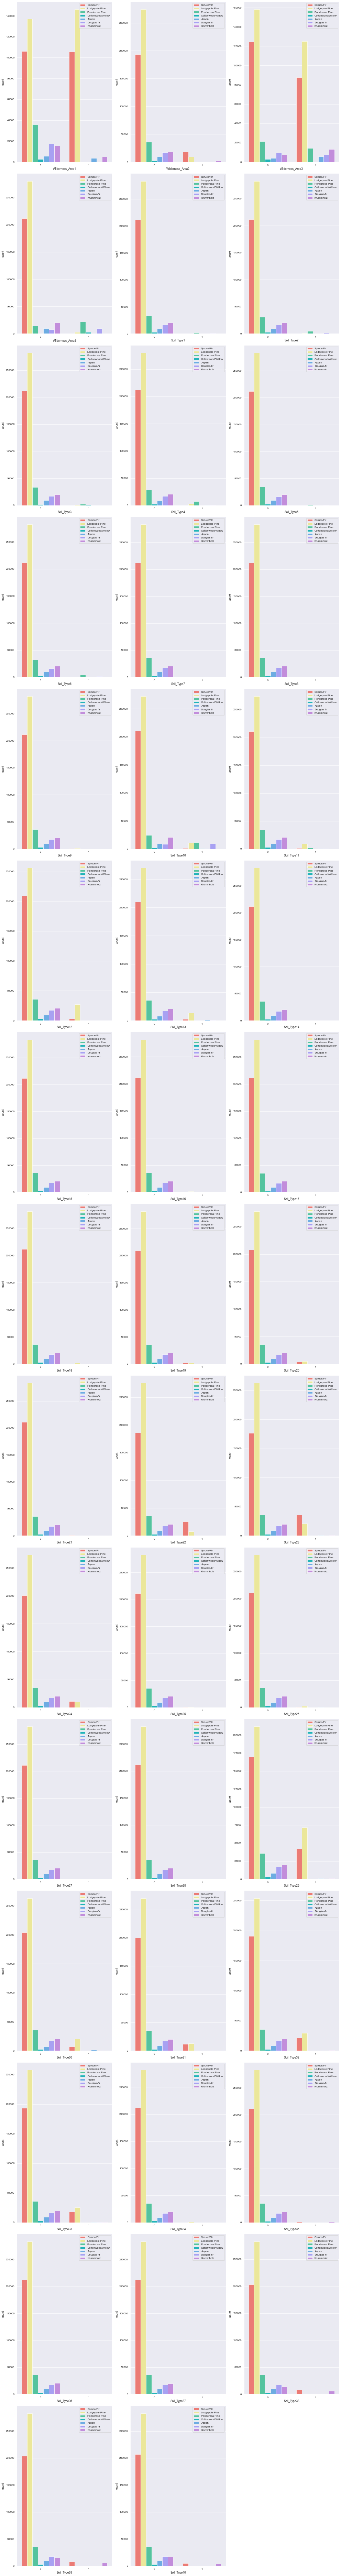

In [10]:
num_cols = 3
num_rows = 15
    
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 150), dpi=50)
axes = axes.flatten()

colors = ['r', '#ff6961', '#f8f38d', '#42d6a4', '#08cad1', '#59adf6', '#9d94ff', '#c780e8']
palette = {key: val for key,val in enumerate(colors)}

for n, col in enumerate(cols[:-1][10:]):
    if n < len(axes):
        count = sns.countplot(raw_df, 
                              x=col, 
                              hue='class', 
                              palette=palette,
                              ax=axes[n])

        count.legend(labels=class_names)
        
for ax in axes[44:]:
    ax.remove()

plt.tight_layout()
plt.show()

## Model Building

After some investigation it was found that there was a class imablance in our data.

#### Impact of imbalance data on loss function
Loss Function: Categorical Crossentropy
 
An imbalance in that data will cause the resulting lose function to have a bias toward the dominating class. To rectify this we can use a weighted loss function.
We calculate the class weights.

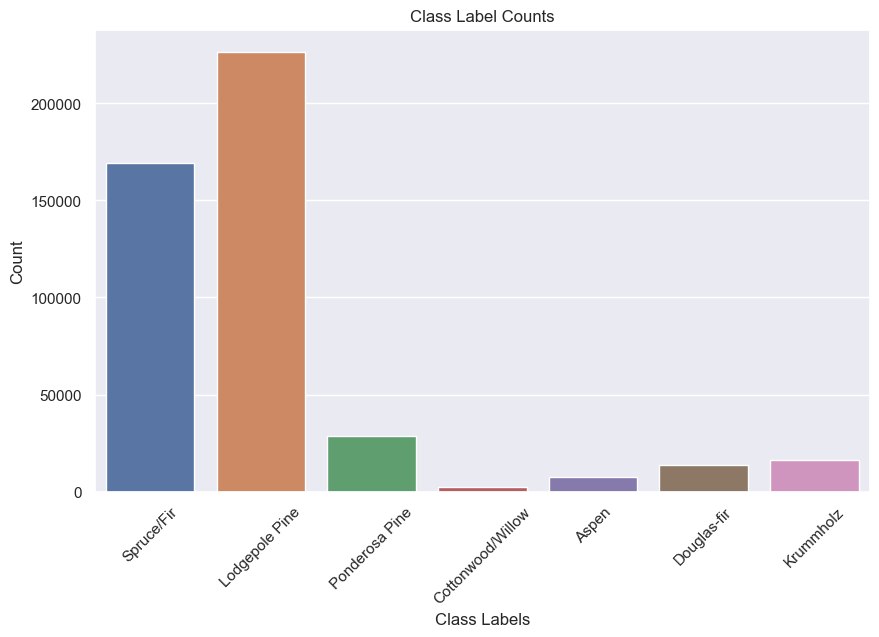

In [11]:
# Create the bar plot
plt.figure(figsize=(10, 6))

sns.countplot(x=y_train)
plt.xticks(ticks=range(7), labels=class_names, rotation=45)

# Customize the plot
plt.title('Class Label Counts')
plt.xlabel('Class Labels')
plt.ylabel('Count')

plt.show()

In [12]:
train_classes = np.unique(y_train)
train_class_counts = np.bincount(y_train)

class_weights = {i: len(train_classes)/train_class_counts[i] for i in range(len(train_classes))}

max_value = max(class_weights.values())

norm_class_weights = {key: values / max_value for key, values in class_weights.items()}

norm_class_weights

{0: 0.012969694108761328,
 1: 0.009698199788210377,
 2: 0.07684508617977136,
 3: 1.0,
 4: 0.28943903081380035,
 5: 0.15819778321577657,
 6: 0.13395904436860068}

### Encoder
A hot-one encoder is used to label the class of tree.

In [13]:
encoder = OneHotEncoder(sparse_output=False, categories='auto')

# Reshape the labels to a column vector
y_train_reshaped = y_train.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

# Perform one-hot encoding
y_train = encoder.fit_transform(y_train_reshaped)
y_test = encoder.fit_transform(y_test_reshaped)

In [14]:
# Build a DL model
num_features = len(features)

model = keras.Sequential()

model.add(layers.Dense(256, input_dim=num_features, activation='relu'))
#model.add(layers.Dropout(0.1))
model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dropout(0.1))
model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dropout(0.1))
model.add(layers.Dense(7, activation='softmax'))

print("\nCompiling model...")
# Compile model with Adam optimizer
opt = tf.keras.optimizers.Adam()

# Loss function is categorical crossentropy
losses = tf.keras.losses.CategoricalCrossentropy()

# Metrics are categorical accuracy and AUC
learning_metrics = [tf.keras.metrics.CategoricalAccuracy()]

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics= [Precision()])    #[F1Score()]) #learning_metrics)

print("Summary report of Keras classifier:")
model.summary()


Compiling model...
Summary report of Keras classifier:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               14080     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 7)                 231       
                                                                 
Total params: 57543 (224.78 KB)
Trainable params: 57543 (224.78 KB)
Non-trainable params: 0 (0.00 Byte)
____________________________

## Training the Data

In [15]:
num_epochs = 100
batch_size = 1024
earlystop_callback = EarlyStopping(monitor='loss', min_delta=0.00005, patience=5)
history = model.fit(X_train,
                    y_train,
                    class_weight=norm_class_weights,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    callbacks=[earlystop_callback],
                    validation_split=0.1,
                    verbose=1)

Epoch 1/100
409/409 [==============================] - 8s 15ms/step - loss: 0.0241 - precision: 0.6550 - val_loss: 0.7709 - val_precision: 0.6791
Epoch 2/100
409/409 [==============================] - 6s 14ms/step - loss: 0.0179 - precision: 0.6957 - val_loss: 0.7420 - val_precision: 0.6889
Epoch 3/100
409/409 [==============================] - 5s 12ms/step - loss: 0.0162 - precision: 0.7217 - val_loss: 0.6740 - val_precision: 0.7174
Epoch 4/100
409/409 [==============================] - 5s 12ms/step - loss: 0.0146 - precision: 0.7487 - val_loss: 0.5839 - val_precision: 0.7585
Epoch 5/100
409/409 [==============================] - 5s 13ms/step - loss: 0.0134 - precision: 0.7681 - val_loss: 0.5092 - val_precision: 0.7951
Epoch 6/100
409/409 [==============================] - 4s 10ms/step - loss: 0.0125 - precision: 0.7829 - val_loss: 0.5522 - val_precision: 0.7782
Epoch 7/100
409/409 [==============================] - 6s 15ms/step - loss: 0.0117 - precision: 0.7940 - val_loss: 0.4672 - 

Epoch 57/100
409/409 [==============================] - 5s 12ms/step - loss: 0.0048 - precision: 0.9068 - val_loss: 0.2574 - val_precision: 0.9040
Epoch 58/100
409/409 [==============================] - 5s 12ms/step - loss: 0.0048 - precision: 0.9072 - val_loss: 0.2628 - val_precision: 0.9015


### Evaluating training
Precision and loss training history are plotted below. The training loss is now weighted using the class weights whereas the validation loss is not.

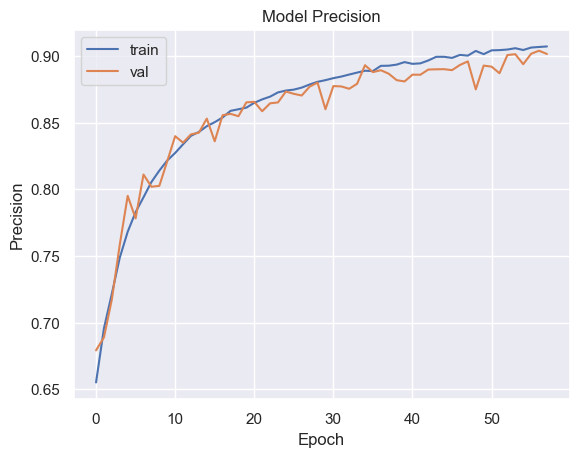

In [16]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Evaluating the model using test data
The model is not evaulated for it's accuracy and the classification table and heatmpa of the confusion matrix is plotted.

In [17]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

y_pred = model.predict(X_test)

Test loss: 0.26759472489356995
Test accuracy: 0.9008525609970093
3632/3632 [==============================] - 7s 2ms/step


                   precision    recall  f1-score   support

       Spruce/Fir       0.93      0.88      0.90     42368
   Lodgepole Pine       0.92      0.90      0.91     56661
   Ponderosa Pine       0.89      0.93      0.91      7151
Cottonwood/Willow       0.69      0.95      0.80       549
            Aspen       0.54      0.97      0.69      1899
      Douglas-fir       0.74      0.91      0.82      3473
        Krummholz       0.81      0.99      0.89      4102

         accuracy                           0.90    116203
        macro avg       0.79      0.93      0.85    116203
     weighted avg       0.91      0.90      0.90    116203



[Text(0, 0.5, 'Spruce/Fir'),
 Text(0, 1.5, 'Lodgepole Pine'),
 Text(0, 2.5, 'Ponderosa Pine'),
 Text(0, 3.5, 'Cottonwood/Willow'),
 Text(0, 4.5, 'Aspen'),
 Text(0, 5.5, 'Douglas-fir'),
 Text(0, 6.5, 'Krummholz')]

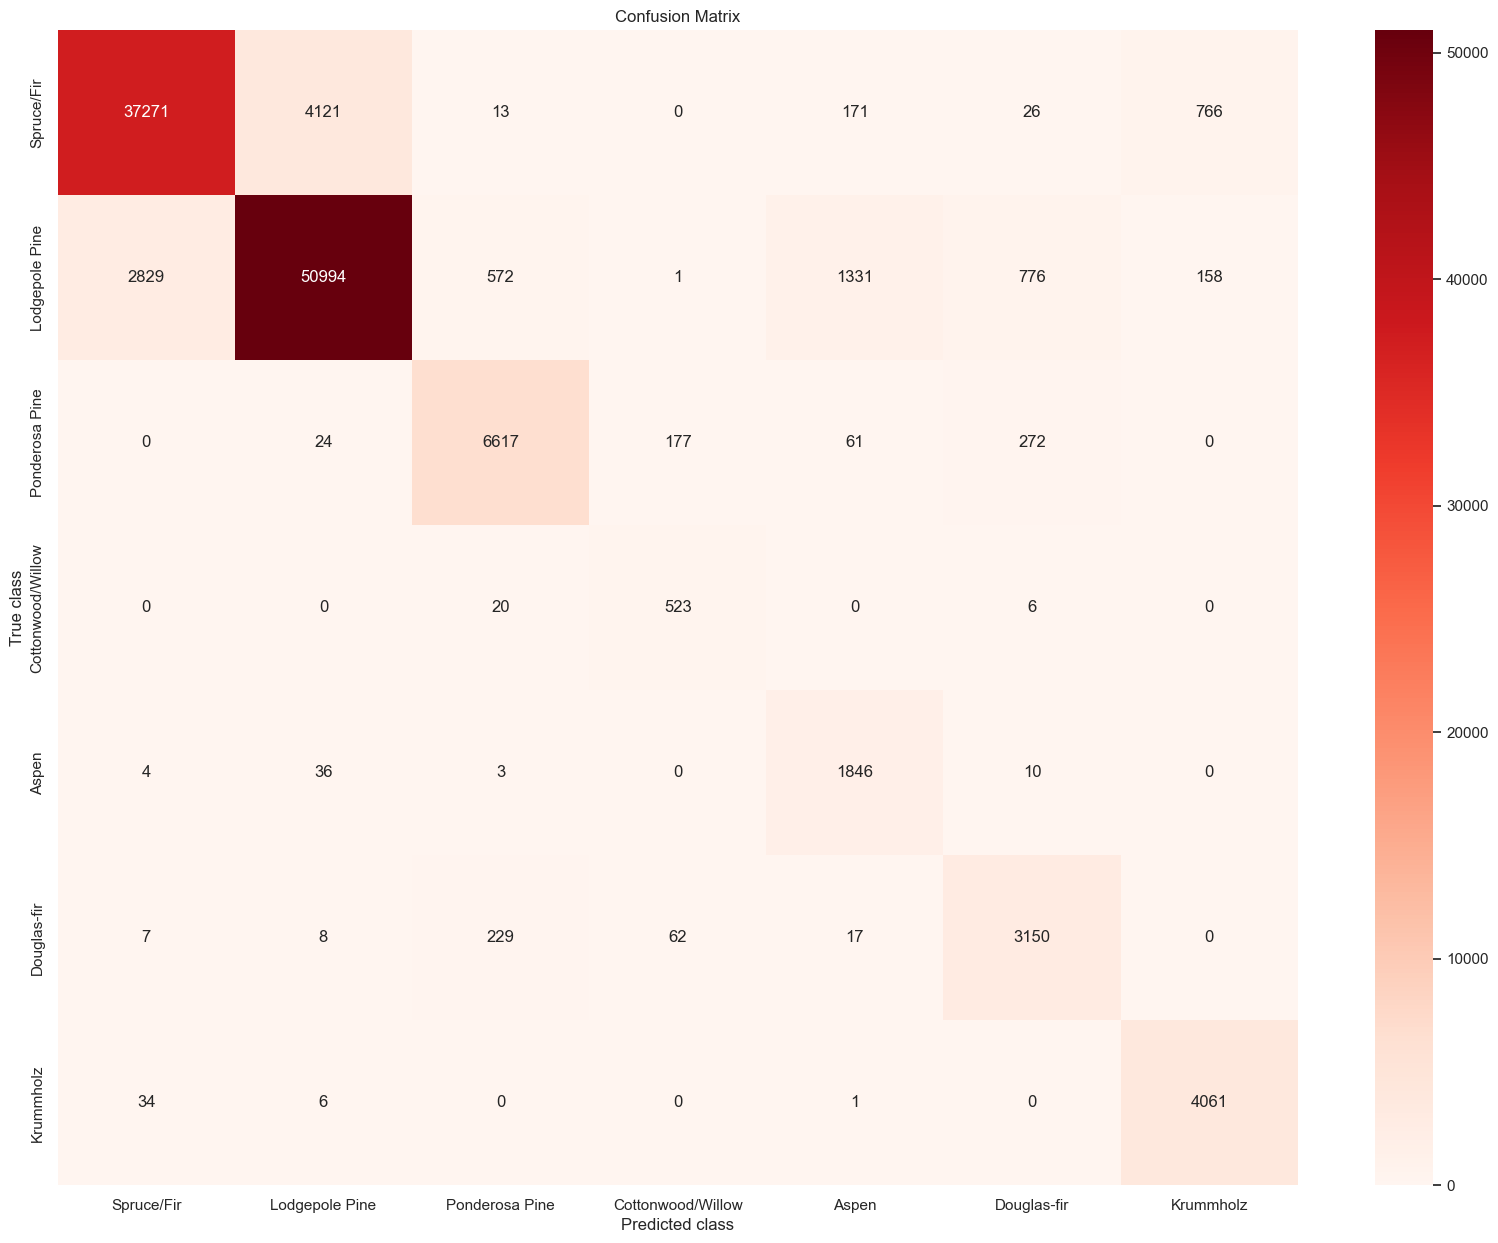

In [18]:
# Convert the pred to discrete values
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred, target_names=class_names))

cm = confusion_matrix(y_test, y_pred, )
fig, ax = plt.subplots(figsize=(20, 15))
heatmap = sns.heatmap(cm, annot=True, cmap='Reds', fmt='1d', ax=ax)
ax.set_xlabel('Predicted class')
ax.set_ylabel('True class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

### Conclusions: 
The numbers along the diagonal of the heatmap show how many were correctly classified. All other numbers on either sides of the diagonal show mis-classifications. 
We see that Lodgepole Pine, Cottonwood Willow, Aspen, and Douglas-Fir suffer from a high percentage of mis-classifications. We see that Lodgepole Pine is commonly mistakes for Aspen.
Further work could be to investigate the possible causes.

Overall the accuracy of the model is ~90%.
